In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Correlation matrix

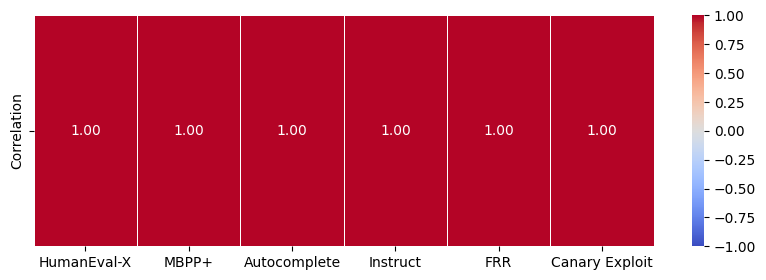

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo as features de interesse
ENERGY_FEATURE = "CPU Energy (J)"
TIME_FEATURE = "Execution time (s)"

# Carregar os dataframes
df_humanevalx = pd.read_csv('df_table_humaneval_x.csv')
df_mbpp = pd.read_csv('df_table_mbpp.csv')
df_autocomplete = pd.read_csv('df_table_autocomplete.csv')
df_instruct = pd.read_csv('df_table_instruct.csv')
df_frr = pd.read_csv('df_table_frr.csv')
df_canary_exploit = pd.read_csv('df_table_canary_exploit.csv')

# Lista dos dataframes com nomes
dataframes = {
    "HumanEval-X": df_humanevalx,
    "MBPP+": df_mbpp,
    "Autocomplete": df_autocomplete,
    "Instruct": df_instruct,
    "FRR": df_frr,
    "Canary Exploit": df_canary_exploit,
}

# Calculando a correlação entre 'Energy' e 'Time' para cada dataframe
correlations = {}
for name, df in dataframes.items():
    if ENERGY_FEATURE in df.columns and TIME_FEATURE in df.columns:
        corr = df[ENERGY_FEATURE].corr(df[TIME_FEATURE])
        correlations[name] = corr
    else:
        correlations[name] = None  # Marcamos como None para colunas ausentes

# Criar um dataframe com os resultados
correlation_df = pd.DataFrame(list(correlations.items()), columns=["Dataset", "Correlation"])

# Configurar heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(
    correlation_df.set_index("Dataset").T,  # Usar os datasets como índice no heatmap
    annot=True,
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    fmt=".2f",
    vmin=-1,
    vmax=1,
)
plt.xlabel('')
plt.title("")
plt.savefig("correlation_matrix.pdf",  dpi=300, bbox_inches='tight')
plt.show()


### Dispersion plot

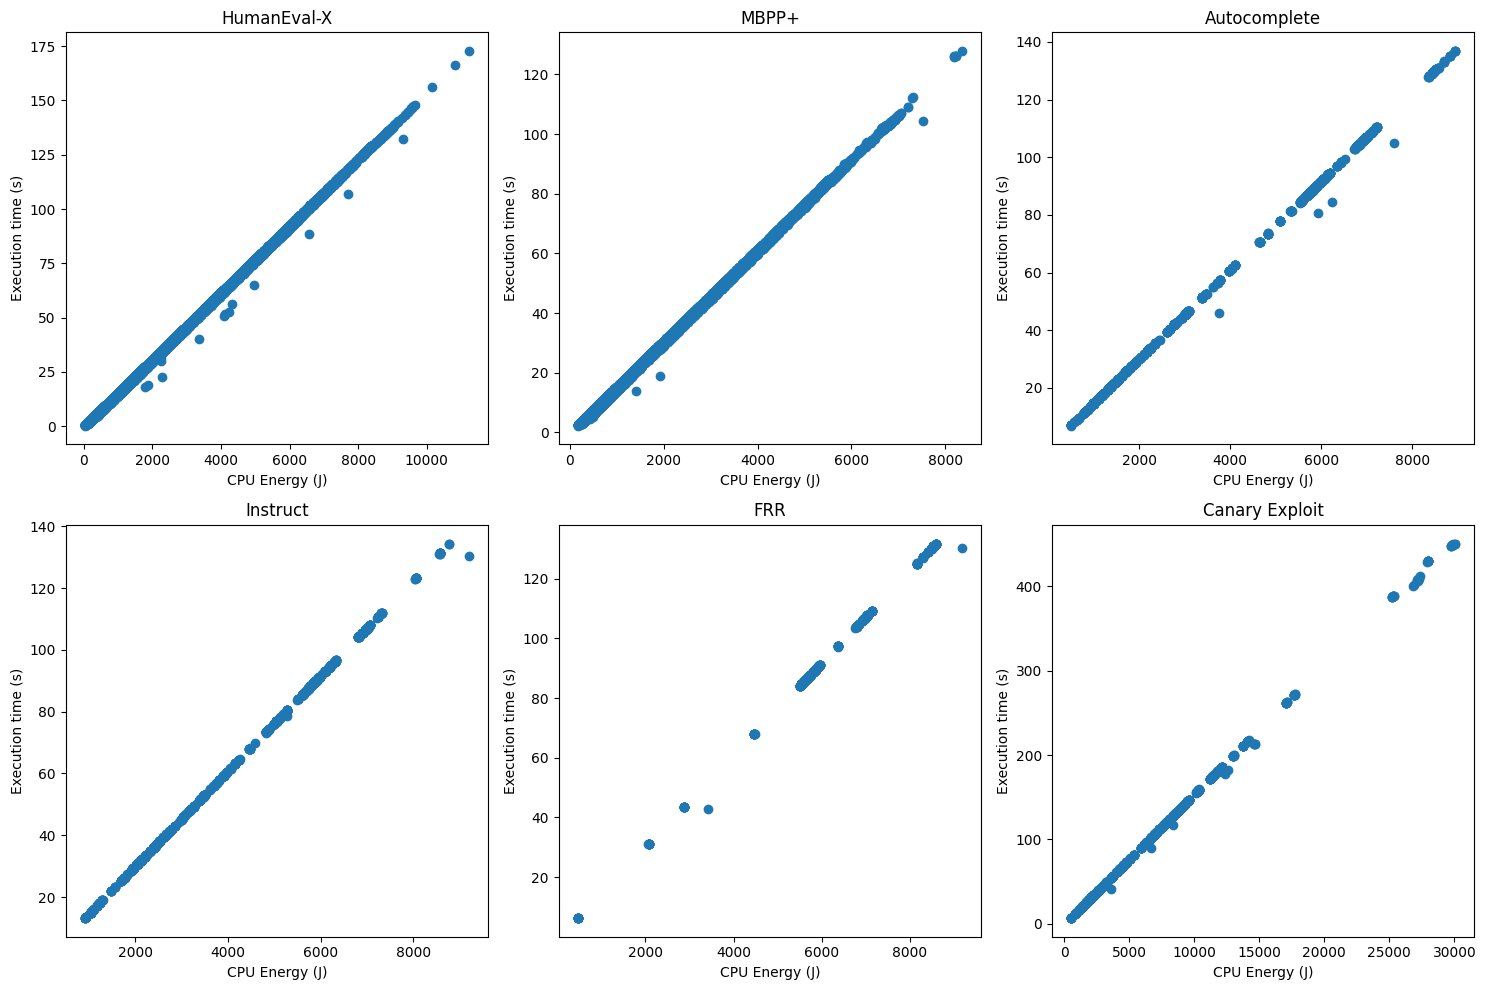

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Definindo as features de interesse
ENERGY_FEATURE = "CPU Energy (J)"
TIME_FEATURE = "Execution time (s)"

# Carregar os dataframes
df_humanevalx = pd.read_csv('df_table_humaneval_x.csv')
df_mbpp = pd.read_csv('df_table_mbpp.csv')
df_autocomplete = pd.read_csv('df_table_autocomplete.csv')
df_instruct = pd.read_csv('df_table_instruct.csv')
df_frr = pd.read_csv('df_table_frr.csv')
df_canary_exploit = pd.read_csv('df_table_canary_exploit.csv')

# Lista dos dataframes com nomes
dataframes = {
    "HumanEval-X": df_humanevalx,
    "MBPP+": df_mbpp,
    "Autocomplete": df_autocomplete,
    "Instruct": df_instruct,
    "FRR": df_frr,
    "Canary Exploit": df_canary_exploit,
}

# Criando a figura e os subgráficos
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 linhas e 3 colunas
axes = axes.flatten()  # Para facilitar o acesso a cada gráfico

# Plotando gráficos de dispersão
for idx, (name, df) in enumerate(dataframes.items()):
    ax = axes[idx]
    if ENERGY_FEATURE in df.columns and TIME_FEATURE in df.columns:
        ax.scatter(df[ENERGY_FEATURE], df[TIME_FEATURE])
        ax.set_title(name)
        ax.set_xlabel(ENERGY_FEATURE)
        ax.set_ylabel(TIME_FEATURE)
    else:
        ax.set_title(f'{name} - Dados Faltando')
        ax.set_xlabel('')
        ax.set_ylabel('')

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()


### Ranking

In [29]:
df_humanevalx = pd.read_csv('df_table_humaneval_x.csv')
df_mbpp= pd.read_csv('df_table_mbpp.csv')
df_autocomplete= pd.read_csv('df_table_autocomplete.csv')
df_instruct= pd.read_csv('df_table_instruct.csv')
df_frr= pd.read_csv('df_table_frr.csv')
df_canary_exploit= pd.read_csv('df_table_canary_exploit.csv')

In [3]:
df_humanevalx_0shot = df_humanevalx[df_humanevalx["N_SHOT"] == "0-shot"]
df_humanevalx_3shot = df_humanevalx[df_humanevalx["N_SHOT"] == "3-shot"]

df_mbpp_0shot = df_mbpp[df_mbpp["N_SHOT"] == "0-shot"]
df_mbpp_3shot = df_mbpp[df_mbpp["N_SHOT"] == "3-shot"]

df_autocomplete_0shot = df_autocomplete[df_autocomplete["N_SHOT"] == "0-shot"]
df_autocomplete_3shot = df_autocomplete[df_autocomplete["N_SHOT"] == "3-shot"]

df_instruct_0shot = df_instruct[df_instruct["N_SHOT"] == "0-shot"]
df_instruct_3shot = df_instruct[df_instruct["N_SHOT"] == "3-shot"]

df_canary_exploit_0shot = df_canary_exploit[df_canary_exploit["N_SHOT"] == "0-shot"]
df_canary_exploit_3shot = df_canary_exploit[df_canary_exploit["N_SHOT"] == "3-shot"]


In [4]:
df_combined = pd.concat(
    [df_humanevalx_0shot, df_humanevalx_3shot,
     df_mbpp_0shot, df_mbpp_3shot, 
     df_autocomplete_0shot, df_autocomplete_3shot, 
     df_frr, 
     df_canary_exploit_0shot, df_canary_exploit_3shot],
    ignore_index=True
)

In [5]:
# Lista das colunas desejadas
desired_columns = [
    'LLM', 
    "N_SHOT",
    'CPU Energy (J)', 
    'Execution time (s)'
]

# Filtrar o DataFrame para manter apenas as colunas desejadas
df_filtered = df_combined[desired_columns]
df_filtered

,LLM,N_SHOT,CPU Energy (J),Execution time (s)
0,Meta-Llama-3-8B-Instruct-Q6_K,0-shot,7704.631642,106.881498
1,Meta-Llama-3-8B-Instruct-Q6_K,0-shot,1834.297858,28.004852
2,Meta-Llama-3-8B-Instruct-Q6_K,0-shot,1104.055857,16.804415
3,Meta-Llama-3-8B-Instruct-Q6_K,0-shot,2519.309653,38.629056
4,Meta-Llama-3-8B-Instruct-Q6_K,0-shot,1040.147644,15.831307
...,...,...,...,...
98510,starling-lm-7b-alpha.Q5_K_S,3-shot,11216.060033,171.912162
98511,starling-lm-7b-alpha.Q5_K_S,3-shot,11510.973759,176.443842
98512,starling-lm-7b-alpha.Q5_K_S,3-shot,11199.539249,171.632784
98513,starling-lm-7b-alpha.Q5_K_S,3-shot,11500.223778,176.280616


In [6]:
df_filtered = df_filtered.groupby(['LLM', "N_SHOT"], as_index=False).mean()
df_filtered

,LLM,N_SHOT,CPU Energy (J),Execution time (s)
0,Meta-Llama-3-8B-Instruct-Q6_K,0-shot,4442.489384,67.820766
1,Meta-Llama-3-8B-Instruct-Q6_K,3-shot,1268.613755,18.976176
2,codegeex4-all-9b-Q6_K_L,0-shot,2590.171404,39.574988
3,codegeex4-all-9b-Q6_K_L,3-shot,1680.563038,25.487313
4,codellama-7b-instruct.Q5_K_M,0-shot,1800.519904,27.338163
5,codellama-7b-instruct.Q5_K_M,3-shot,1086.577043,16.101067
6,deepseek-coder-6.7b-instruct.Q5_K_M,0-shot,4077.739570,62.373446
7,deepseek-coder-6.7b-instruct.Q5_K_M,3-shot,1105.952652,16.662136
8,starling-lm-7b-alpha.Q5_K_S,0-shot,5472.362736,83.770284
9,starling-lm-7b-alpha.Q5_K_S,3-shot,1183.044736,17.771986


In [7]:
N_SHOT_RANKING = "0-shot"

df_filtered_rank = df_filtered[df_filtered["N_SHOT"] == N_SHOT_RANKING]

# Ordena o DataFrame pela coluna 'CPU Energy (J)' em ordem crescente para o ranking de consumo de energia
df_ranked = df_filtered_rank.sort_values(by='CPU Energy (J)').reset_index(drop=True)

# Adiciona uma coluna de ranking com base na CPU Energy
df_ranked['Rank'] = range(1, len(df_ranked) + 1)

# Define o consumo de energia e o tempo de execução da primeira LLM como referência
first_energy = df_ranked['CPU Energy (J)'].iloc[0]
first_time = df_ranked['Execution time (s)'].iloc[0]

# Calcula as razões em relação ao primeiro lugar
df_ranked['Energy Ratio (compared to 1st)'] = df_ranked['CPU Energy (J)'] / first_energy
df_ranked['Time Ratio (compared to 1st)'] = df_ranked['Execution time (s)'] / first_time

# Reorganiza as colunas para melhor visualização
df_ranked = df_ranked[["N_SHOT", 'Rank', 'LLM', 
                       'Energy Ratio (compared to 1st)', 'Time Ratio (compared to 1st)', 
                       'CPU Energy (J)', 'Execution time (s)'
                       ]]

# Renomeia as colunas conforme desejado
df_ranked.rename(columns={
    'CPU Energy (J)': 'CPU Energy (J)',
    'Execution time (s)': 'Execution Time (s)',
}, inplace=True)

# Exibe o ranking final
df_ranked.style.hide_index()


/tmp/ipykernel_10149/148711065.py:32: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df_ranked.style.hide_index()


N_SHOT,Rank,LLM,Energy Ratio (compared to 1st),Time Ratio (compared to 1st),CPU Energy (J),Execution Time (s)
0-shot,1,codellama-7b-instruct.Q5_K_M,1.000000,1.000000,1800.519904,27.338163
0-shot,2,codegeex4-all-9b-Q6_K_L,1.438569,1.447610,2590.171404,39.574988
0-shot,3,deepseek-coder-6.7b-instruct.Q5_K_M,2.264757,2.281552,4077.739570,62.373446
0-shot,4,Meta-Llama-3-8B-Instruct-Q6_K,2.467337,2.480809,4442.489384,67.820766
0-shot,5,starling-lm-7b-alpha.Q5_K_S,3.039324,3.064225,5472.362736,83.770284


In [8]:
N_SHOT_RANKING = "3-shot"

df_filtered_rank = df_filtered[df_filtered["N_SHOT"] == N_SHOT_RANKING]

# Ordena o DataFrame pela coluna 'CPU Energy (J)' em ordem crescente para o ranking de consumo de energia
df_ranked = df_filtered_rank.sort_values(by='CPU Energy (J)').reset_index(drop=True)

# Adiciona uma coluna de ranking com base na CPU Energy
df_ranked['Rank'] = range(1, len(df_ranked) + 1)

# Define o consumo de energia e o tempo de execução da primeira LLM como referência
first_energy = df_ranked['CPU Energy (J)'].iloc[0]
first_time = df_ranked['Execution time (s)'].iloc[0]

# Calcula as razões em relação ao primeiro lugar
df_ranked['Energy Ratio (compared to 1st)'] = df_ranked['CPU Energy (J)'] / first_energy
df_ranked['Time Ratio (compared to 1st)'] = df_ranked['Execution time (s)'] / first_time

# Reorganiza as colunas para melhor visualização
df_ranked = df_ranked[["N_SHOT", 'Rank', 'LLM', 
                       'Energy Ratio (compared to 1st)', 'Time Ratio (compared to 1st)', 
                       'CPU Energy (J)', 'Execution time (s)'
                       ]]

# Renomeia as colunas conforme desejado
df_ranked.rename(columns={
    'CPU Energy (J)': 'CPU Energy (J)',
    'Execution time (s)': 'Execution Time (s)',
}, inplace=True)

# Exibe o ranking final
df_ranked.style.hide_index()


/tmp/ipykernel_10149/1010361541.py:32: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df_ranked.style.hide_index()


N_SHOT,Rank,LLM,Energy Ratio (compared to 1st),Time Ratio (compared to 1st),CPU Energy (J),Execution Time (s)
3-shot,1,codellama-7b-instruct.Q5_K_M,1.000000,1.000000,1086.577043,16.101067
3-shot,2,deepseek-coder-6.7b-instruct.Q5_K_M,1.017832,1.034847,1105.952652,16.662136
3-shot,3,starling-lm-7b-alpha.Q5_K_S,1.088781,1.103777,1183.044736,17.771986
3-shot,4,Meta-Llama-3-8B-Instruct-Q6_K,1.167532,1.178566,1268.613755,18.976176
3-shot,5,codegeex4-all-9b-Q6_K_L,1.546658,1.582958,1680.563038,25.487313
